# Predicting the prices of Flight

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [143]:
FlightData=pd.read_excel('D:\ML\Predict the prices of Flight\FlightData.xlsx')

In [144]:
FlightData.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Dealing with Missing Values  

In [145]:
FlightData.shape

(10683, 11)

In [146]:
FlightData.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

##### as there is less missing values, we can directly drop these

In [147]:
FlightData.dropna(inplace=True)

In [148]:
FlightData.isnull().sum()
#Now we don't have any missing value

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Checking Data Types

In [149]:
FlightData.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Updating Data Type

From description we can see that Date_of_Journey is a object data type,

Therefore, we have to convert this datatype into timestamp 

For this we require pandas to_datetime to convert object data type to datetime dtype.

In [150]:
def change_into_datetime(col):
    FlightData[col]=pd.to_datetime(FlightData[col])

In [151]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [152]:
FlightData.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

dt.day method will extract only day of that date

dt.month method will extract only month of that date

### 1. Extracting Journey_day and Journey_month from Date_of_Journey column  to dataset

In [153]:
FlightData['Journey_day']=FlightData['Date_of_Journey'].dt.day
FlightData['Journey_month']=FlightData['Date_of_Journey'].dt.month

In [154]:
FlightData.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-08 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-03-08 05:50:00,2022-03-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-03-08 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-03-08 18:05:00,2022-03-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-03-08 16:50:00,2022-03-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


##### Droping Data_of_Journey Column as it of no use

In [155]:
#Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
FlightData.drop('Date_of_Journey', axis=1, inplace=True)

In [156]:
FlightData.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-08 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-03-08 05:50:00,2022-03-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-03-08 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-03-08 18:05:00,2022-03-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-03-08 16:50:00,2022-03-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


### 2. Similarly we can extract hr and min from Arrival_Time and Dept_Time

In [157]:
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour

In [158]:
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute

In [159]:
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [160]:
#Extracting hr and min from dept_time
extract_hour(FlightData,'Dep_Time')
extract_min(FlightData,'Dep_Time')

In [161]:
#Extracting hr and min from Arrival_time
extract_hour(FlightData,'Arrival_Time')
extract_min(FlightData,'Arrival_Time')

##### Dropping dept_time and Arrival_time col from data as it is of no use

In [162]:
drop_column(FlightData,'Dep_Time')
drop_column(FlightData,'Arrival_Time')

In [163]:
FlightData.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


### 3. Lets Apply pre-processing on duration column and Extract hr and min from Duration

In [164]:
'2h 50m'.split(' ')

['2h', '50m']

In [165]:
x='2h 50min'
len(x.split(' '))

2

In [166]:
duration=list(FlightData['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   #Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      #Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       #if duration contains only second, Adds 0 hour
    

In [167]:
FlightData['Duration']=duration

In [168]:
FlightData.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


##### Extracting hr and min from Duration seperately and dropping duration column

In [169]:
'2h 50m'.split(' ')[1][0:-1]

'50'

In [170]:
#Fetching hr from the list
def hour(x):
    return x.split(' ')[0][0:-1]

In [171]:
#Fetching min from the list
def min(x):
    return x.split(' ')[1][0:-1]

In [172]:
FlightData['Duration_hours']=FlightData['Duration'].apply(hour)
FlightData['Duration_mins']=FlightData['Duration'].apply(min)

##### Dropping duration column as it is of no use

In [173]:
FlightData.drop('Duration',axis=1,inplace=True)

In [174]:
FlightData.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


### Checking Data Types

In [175]:
FlightData.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

### Updating data type of duration hr and min into integer type

In [176]:
FlightData['Duration_hours']=FlightData['Duration_hours'].astype(int)
FlightData['Duration_mins']=FlightData['Duration_mins'].astype(int)

In [177]:
FlightData.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

### Fetching categorical and continuous features from data

In [178]:
cat_col=[col for col in FlightData.columns if FlightData[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [179]:
cont_col=[col for col in FlightData.columns if FlightData[col].dtype!='O']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

### Handling Categorical Data and perform feature technique on our data

In [180]:
categorical=FlightData[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


#### Convert categorical variable into dummy/indicator variables.

    We are using 2 main Encoding Techniques to convert Categorical data into some numerical format
 
    Nominal data  --> data are not in any order  -->  OneHotEncoder is used in this case
    Ordinal data  --> data are in order          -->  LabelEncoder is used in this case

#### 1.Airlines

In [181]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

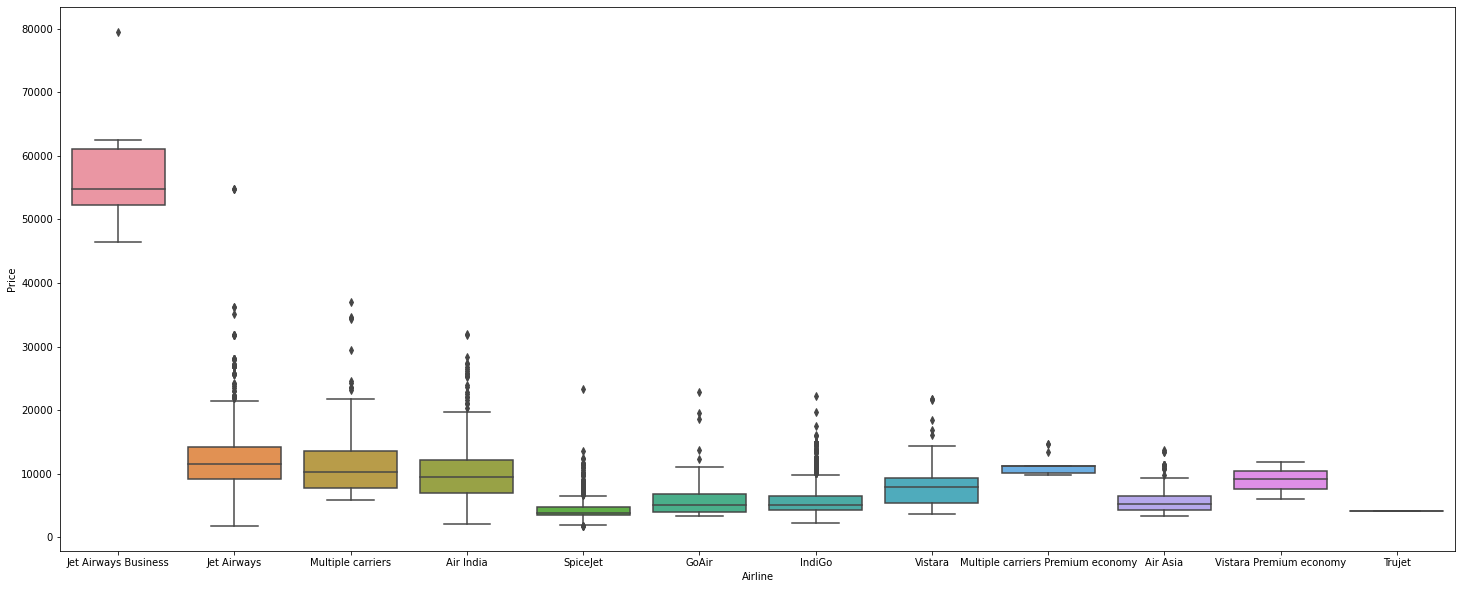

In [182]:
#Airline vs Price Analysis
plt.figure(figsize=(25,10))
sns.boxplot(y='Price',x='Airline',data=FlightData.sort_values('Price',ascending=False))

Conclusion: Jet_Airways business has the highest price

where as almost all airlines are having similar median, there is no much fluctuation

In [183]:
#As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


#### 2.Source

In [184]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

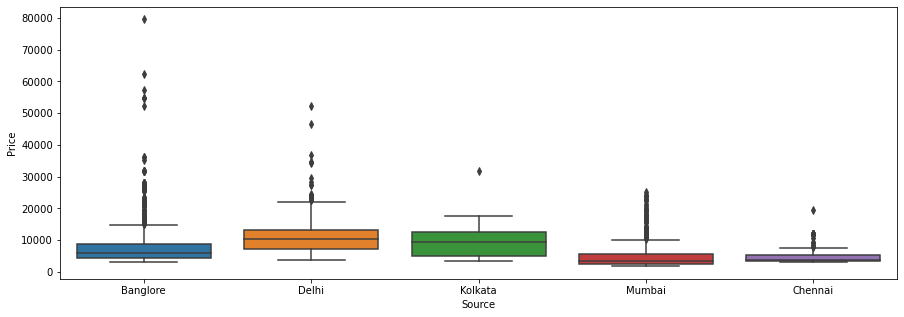

In [185]:
#Distribution of Source with respect to Price
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Source',data=FlightData.sort_values('Price',ascending=False))

Conclusion: Bangalore has the highest fluctuation, Delhi has the highest median compared to all cities of India

In [186]:
#As Source is Nominal Categorical data we will perform OneHotEncoding
Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


#### 3.Destination

In [187]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

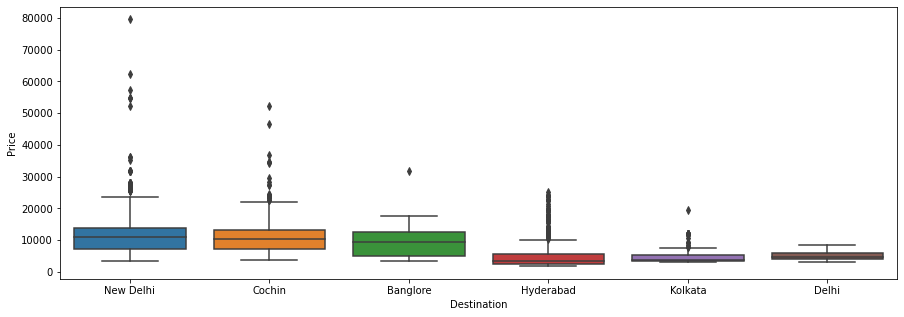

In [188]:
#Distribution of Destination with respect to Price
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Destination',data=FlightData.sort_values('Price',ascending=False))

Conclusion: Flights that are going to New Delhi has the highest price where as flights that are going towards kolkata has the lowest price

In [189]:
#As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


#### 4.Route

In [190]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

Extracting route values seperately from Routes column

In [191]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

Deleting Route Column as it is of no use

In [192]:
drop_column(categorical,"Route")

In [193]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


### Checking Whether Categorical feature has any null values and Filling it with None

In [194]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [195]:
#Updating missing values with none
for i in['Route_3', 'Route_4','Route_5']:
    categorical[i].fillna('None',inplace=True)

In [196]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

### Extracting how many categories in each cat_feature

In [197]:
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



Conclusion: as we will see we have lots of features in Route and it will definetly create some problem for the algorithm that we are going to use as my data becomes huge.

To get rid of this high dimensional issue one hot encoding will not be a better option so lets appply Label Encoding

In [198]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [199]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [200]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [201]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


### Droping Aditional_info column as it is of no use

In [202]:
drop_column(categorical,'Additional_Info')

In [203]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


##### 5.Total_Stops

In [204]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

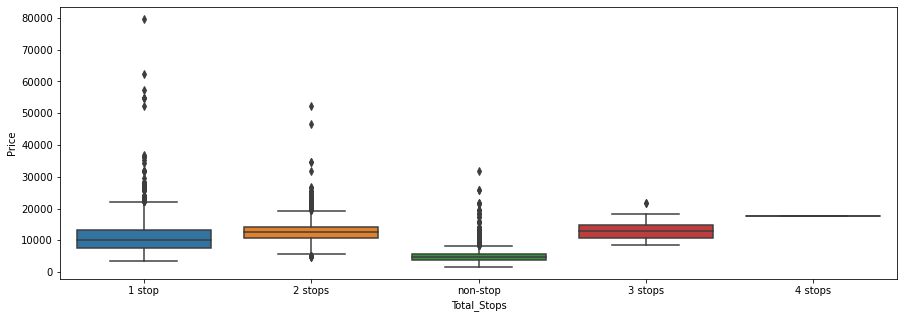

In [205]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=FlightData.sort_values('Price',ascending=False))

Conclusion: Here with respect one stop, we have some outlet in data

which means flight who has just single stop maybe have a higher fare than others and flight who has just 4 stops their price isn't fluctuating very much

In [206]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [207]:
#As this is case of Ordinal Categorical type we perform LabelEncoder
#Here Values are assigned with corresponding key
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [208]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [209]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


### Concatenate dataframe --> categorical + Airline + Source + Destination

In [210]:
FlightData=pd.concat([categorical,Airline,Source,Destination,FlightData[cont_col]],axis=1)
FlightData.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,...,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [211]:
drop_column(FlightData,'Airline')
drop_column(FlightData,'Source')
drop_column(FlightData,'Destination')

In [212]:
FlightData.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


### To Display all the 35 columns

In [213]:
pd.set_option('display.max_columns',35)

In [214]:
FlightData.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


### Outliers Detection and Imputation in data

Checking whether we have some outlier in price cloumn or not 

Two main visuals that will be very handy when we are dealing with outliers are distribution approach and boxplot approach.

In [215]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

<Figure size 2160x1440 with 0 Axes>

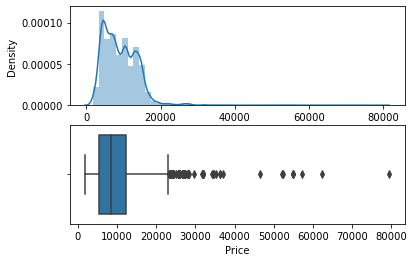

In [216]:
plt.figure(figsize=(30,20))
plot(FlightData,'Price')

Conclusion: Whatever the data points greater than 40000 that will be our outlier

So we are replacing it with median as it plays a very handy role over there

In [217]:
FlightData['Price']=np.where(FlightData['Price']>=40000,FlightData['Price'].median(),FlightData['Price'])

<Figure size 2160x1440 with 0 Axes>

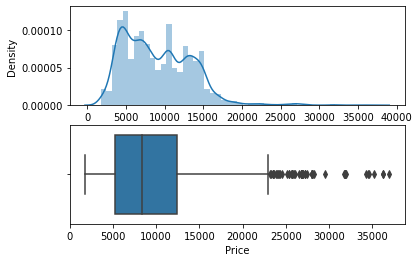

In [218]:
plt.figure(figsize=(30,20))
plot(FlightData,'Price')

### separating independent & dependent data

In [219]:
X=FlightData.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [220]:
X.shape

(10682, 34)

In [221]:
Y=FlightData['Price']
Y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

### Finding out the best feature which will contribute and have good relation with target variable. 
####  Feature Selection using Information Gain,

Why to apply Feature Selection?


To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features

In [222]:
from sklearn.feature_selection import mutual_info_classif

In [223]:
mutual_info_classif(X,Y)

array([2.14652529, 2.09986034, 2.75992651, 2.27826108, 1.49033835,
       0.77241857, 0.77228577, 0.09615168, 0.66161225, 0.91251607,
       0.01099263, 0.56663128, 0.00693411, 0.31218817, 0.01501554,
       0.22694638, 0.00796476, 0.16282014, 1.50764761, 0.87159353,
       0.29555619, 1.5337117 , 0.40449567, 0.30745676, 0.16605971,
       0.36162517, 1.09066233, 0.89582171, 1.41327398, 1.22547096,
       1.81043846, 1.53620734, 1.77394002, 1.08626802])

In [224]:
imp_DataFrame=pd.DataFrame(mutual_info_classif(X,Y),index=X.columns)
imp_DataFrame

,0
Total_Stops,2.173883
Route_1,2.042323
Route_2,2.762461
Route_3,2.264530
Route_4,1.489715
Route_5,0.739291
Air India,0.764139
GoAir,0.109396
IndiGo,0.688410
Jet Airways,0.929671


In [225]:
imp_DataFrame.columns=['importance']
imp_DataFrame.sort_values(by='importance',ascending=False)

,importance
Route_2,2.762461
Route_3,2.264530
Total_Stops,2.173883
Route_1,2.042323
Arrival_Time_hour,1.858804
Duration_hours,1.771932
Cochin,1.542520
Arrival_Time_minute,1.538729
Delhi,1.528348
Route_4,1.489715


### split dataset into train & test

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

### dump your model using pickle so that we will re-use

In [228]:
from sklearn import metrics
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,Y_train)
    print('Training score : {}'.format(model.score(X_train,Y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score=metrics.r2_score(Y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(Y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(Y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_prediction)))
    
    sns.distplot(Y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('D:\ML\Predict the prices of Flight\dumping/flightprice.pkl','wb')
        pickle.dump(model,file)

### import randomforest class

In [229]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9548089212119882
predictions are: 
 [ 3784.66       12876.766      11263.06416667 ...  7054.1325
  8609.12        5930.148     ]


r2 score: 0.8138888256849529
MAE: 1152.750471684895
MSE: 3621536.6769426134
RMSE: 1903.0335459320243


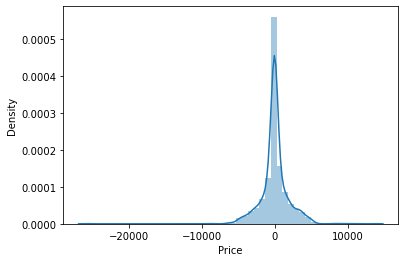

In [230]:
predict(RandomForestRegressor(),1)

### Checking with multiple Algorithms

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Training score : 0.6162163568896691
predictions are: 
 [ 2707.44934811 12230.50040653 11530.94470306 ...  7185.06753118
 10794.27891574  5930.35632387]


r2 score: 0.6133235824933215
MAE: 1949.2259461669062
MSE: 7524335.028581845
RMSE: 2743.052137415883


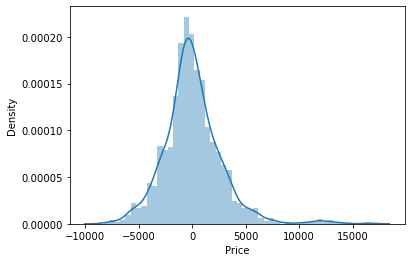

In [232]:
predict(LinearRegression(),0)

Training score : 0.7832619292031491
predictions are: 
 [ 4323.2 12484.8 10744.4 ...  6052.2  8274.8  4856.2]


r2 score: 0.6589410261887274
MAE: 1736.8435189518016
MSE: 6636665.354478241
RMSE: 2576.1726173683005


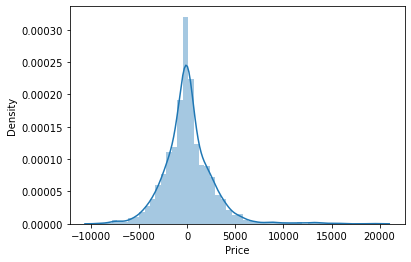

In [233]:
predict(KNeighborsRegressor(),0)

Training score : 0.9681486271995229
predictions are: 
 [ 3419. 13014. 10844. ...  7229.  8476.  5902.]


r2 score: 0.7148909622626587
MAE: 1335.1287084698174
MSE: 5547935.748047757
RMSE: 2355.4056440553413


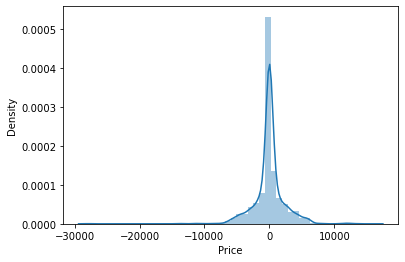

In [234]:
predict(DecisionTreeRegressor(),0)

#### Hyperparameter Tuning

Return us best parameters for our model 

    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slow way to hypertune my model
    
    2.Assign hyperparameters in form of dictionary
    3.Fit the model
    4.Check best paramters and best score

In [235]:
from sklearn.model_selection import RandomizedSearchCV

In [236]:
from sklearn.ensemble import RandomForestRegressor

In [237]:
RegRf=RandomForestRegressor()  #Shift+tab

In [238]:
#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

#Number of features to consider at every split
max_features=['auto','sqrt']

#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

#Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [239]:
#Create the random grid
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [240]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [241]:
#Random search of parameters, using 3 fold cross validation
rf=RandomizedSearchCV(estimator=RegRf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [242]:
rf.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [243]:
rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [244]:
prediction=rf.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

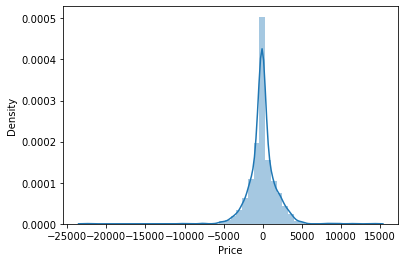

In [245]:
sns.distplot(Y_test-prediction)

In [246]:
metrics.r2_score(Y_test,prediction)

0.8469831206891101

### Save the model to reuse it again

In [247]:
import pickle

In [248]:
#open a file, where you want to store the data
file=open('D:\ML\Predict the prices of Flight\dumping/rf.pkl','wb')

In [249]:
#dump information to that file
pickle.dump(rf,file)

In [250]:
model=open('D:\ML\Predict the prices of Flight\dumping/flightprice.pkl','rb')
Rforest=pickle.load(model)

In [251]:
Y_prediction=Rforest.predict(X_test)

In [252]:
Y_prediction

array([ 3784.66      , 12876.766     , 11263.06416667, ...,
        7054.1325    ,  8609.12      ,  5930.148     ])

In [253]:
metrics.r2_score(Y_test,Y_prediction)

0.8138888256849529